In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import setuptools

# Keras is a high-level neural network Python API
# Runs on top of lower-level libraries like TensorFlow
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Loading the Dataset

In [2]:
data = pd.read_csv("/Users/gauravkharel/Documents/BoozAllen/Data Science/Capstone/NFLPlaybyPlay2015.csv")

/var/folders/q_/jngx2c4j3d57vcn5b3qsyqcw0000gn/T/ipykernel_25464/3281832509.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/gauravkharel/Documents/BoozAllen/Data Science/Capstone/NFLPlaybyPlay2015.csv")


#Exploring the Dataset

In [3]:
data.shape

(46129, 66)

Predictor: GameID, Drive, qtr, down, time (game clock), yrdline100, ydstogo, GoalToGo, passer, rusher, receiver, PosTeamScore, DefTeamScore, posteam, DefensiveTeam, FieldGoalDistance,ScoreDiff

targetColumn = PlayType (Run, Pass, Field Goal, Punt)

In [4]:
data.columns

Index(['Unnamed: 0', 'Date', 'GameID', 'Drive', 'qtr', 'down', 'time',
       'TimeUnder', 'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln',
       'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp',
       'Touchdown', 'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'Safety',
       'PuntResult', 'PlayType', 'Passer', 'PassAttempt', 'PassOutcome',
       'PassLength', 'PassLocation', 'InterceptionThrown', 'Interceptor',
       'Rusher', 'RushAttempt', 'RunLocation', 'RunGap', 'Receiver',
       'Reception', 'ReturnResult', 'Returner', 'BlockingPlayer', 'Tackler1',
       'Tackler2', 'FieldGoalResult', 'FieldGoalDistance', 'Fumble',
       'RecFumbTeam', 'RecFumbPlayer', 'Sack', 'Challenge.Replay',
       'ChalReplayResult', 'Accepted.Penalty', 'PenalizedTeam', 'PenaltyType',
       'PenalizedPlayer', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore',
       'ScoreDiff', 'AbsScoreDiff', 'Season'],

In [5]:
playType = ['Run','Pass',"Field Goal",'Punt']
data = data[data["PlayType"].isin(playType)]
data = data.dropna(subset=["PlayType", "down"])
data["FieldGoalDistance"] = data["FieldGoalDistance"].fillna(0)

In [6]:
predictorCols = ["GameID", "Drive", "qtr", "down", "time", "yrdline100", "ydstogo", "GoalToGo", "PosTeamScore", "DefTeamScore",\
                 "FieldGoalDistance", "ScoreDiff"]
df = data[predictorCols]

In [7]:
df["time"] = df["time"].apply(lambda x: int(x.replace(':','')))

/var/folders/q_/jngx2c4j3d57vcn5b3qsyqcw0000gn/T/ipykernel_25464/4034042521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"] = df["time"].apply(lambda x: int(x.replace(':','')))


In [8]:
df.columns

Index(['GameID', 'Drive', 'qtr', 'down', 'time', 'yrdline100', 'ydstogo',
       'GoalToGo', 'PosTeamScore', 'DefTeamScore', 'FieldGoalDistance',
       'ScoreDiff'],
      dtype='object')

In [9]:
df.shape

(34755, 12)

In [10]:
target = data["PlayType"]

<Axes: xlabel='PlayType'>

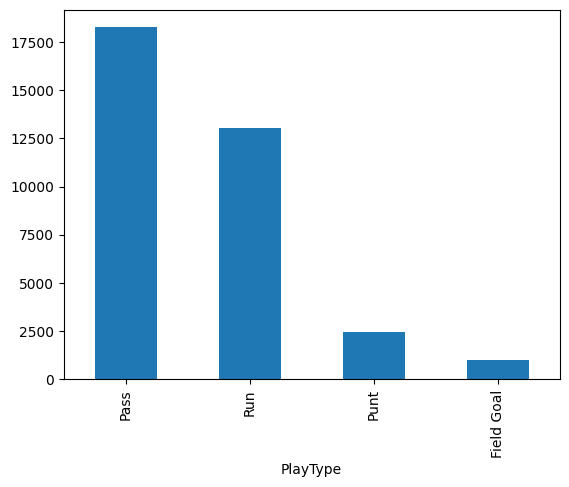

In [11]:
target.value_counts().plot(kind='bar')

In [12]:
target.unique()

array(['Run', 'Pass', 'Field Goal', 'Punt'], dtype=object)

In [13]:
target_col = target.replace({'Pass': 0, 'Run': 1, 'Punt':2, "Field Goal":3})

/var/folders/q_/jngx2c4j3d57vcn5b3qsyqcw0000gn/T/ipykernel_25464/2338959956.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_col = target.replace({'Pass': 0, 'Run': 1, 'Punt':2, "Field Goal":3})


In [14]:
target = pd.DataFrame(target_col)

In [15]:
target.head()

,PlayType
1,1
2,0
3,1
4,0
5,1


In [16]:
df.head()

,GameID,Drive,qtr,down,time,yrdline100,ydstogo,GoalToGo,PosTeamScore,DefTeamScore,FieldGoalDistance,ScoreDiff
1,2015091000,1,1,1.0,1500,80.0,10,0.0,0.0,0.0,0.0,0.0
2,2015091000,1,1,1.0,1421,62.0,10,0.0,0.0,0.0,0.0,0.0
3,2015091000,1,1,2.0,1404,53.0,1,0.0,0.0,0.0,0.0,0.0
4,2015091000,1,1,1.0,1326,49.0,10,0.0,0.0,0.0,0.0,0.0
5,2015091000,1,1,1.0,1242,35.0,10,0.0,0.0,0.0,0.0,0.0


In [17]:
len(df.columns)

12

# Creating a training and a testing set of data

In [18]:
target.shape  # This is the target variable

(34755, 1)

In [19]:
df.shape    # This is the predictor variable

(34755, 12)

In [20]:
scaler = StandardScaler().set_output(transform='pandas')
feature_mat = scaler.fit_transform(df)

In [21]:
feature_mat

,GameID,Drive,qtr,down,time,yrdline100,ydstogo,GoalToGo,PosTeamScore,DefTeamScore,FieldGoalDistance,ScoreDiff
1,-0.335195,-1.546073,-1.366145,-0.983773,1.762368,1.081239,0.330279,-0.262346,-1.101194,-1.148133,-0.164856,0.105585
2,-0.335195,-1.546073,-1.366145,-0.983773,1.586879,0.355412,0.330279,-0.262346,-1.101194,-1.148133,-0.164856,0.105585
3,-0.335195,-1.546073,-1.366145,0.003351,1.549116,-0.007501,-1.830288,-0.262346,-1.101194,-1.148133,-0.164856,0.105585
4,-0.335195,-1.546073,-1.366145,-0.983773,1.375849,-0.168796,0.330279,-0.262346,-1.101194,-1.148133,-0.164856,0.105585
5,-0.335195,-1.546073,-1.366145,-0.983773,1.189255,-0.733327,0.330279,-0.262346,-1.101194,-1.148133,-0.164856,0.105585
...,...,...,...,...,...,...,...,...,...,...,...,...
46124,3.865044,1.414519,1.271556,1.977599,-1.474166,0.194118,0.330279,-0.262346,0.289601,0.763420,-0.164856,-0.460610
46125,3.865044,1.414519,1.271556,-0.983773,-1.509708,-0.289767,0.330279,-0.262346,0.289601,0.763420,-0.164856,-0.460610
46126,3.865044,1.414519,1.271556,0.003351,-1.516372,-0.572033,-1.350162,-0.262346,0.289601,0.763420,-0.164856,-0.460610
46127,3.865044,1.414519,1.271556,0.990475,-1.536365,-0.572033,-1.350162,-0.262346,0.289601,0.763420,-0.164856,-0.460610


In [22]:
pd.DataFrame(feature_mat).describe()

,GameID,Drive,qtr,down,time,yrdline100,ydstogo,GoalToGo,PosTeamScore,DefTeamScore,FieldGoalDistance,ScoreDiff
count,3.475500e+04,3.475500e+04,3.475500e+04,3.475500e+04,3.475500e+04,3.475500e+04,3.475500e+04,3.475500e+04,3.475500e+04,3.475500e+04,3.475500e+04,3.475500e+04
mean,-8.936626e-14,7.768846e-17,-6.910184e-17,8.116400e-17,-5.785746e-17,-1.271637e-16,-1.341148e-16,3.189316e-17,6.419520e-17,2.943984e-17,-4.170644e-17,9.097727e-18
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-3.351949e-01,-1.546073e+00,-1.366145e+00,-9.837725e-01,-1.569685e+00,-2.104333e+00,-1.830288e+00,-2.623462e-01,-1.101194e+00,-1.148133e+00,-1.648559e-01,-3.763411e+00
25%,-2.890489e-01,-8.411699e-01,-4.869115e-01,-9.837725e-01,-8.832822e-01,-7.736511e-01,-6.299729e-01,-2.623462e-01,-7.802416e-01,-8.463091e-01,-1.648559e-01,-5.549755e-01
50%,-2.446986e-01,4.713550e-03,3.923221e-01,3.351478e-03,5.265132e-03,1.537939e-01,3.302792e-01,-2.623462e-01,-1.383361e-01,-1.420526e-01,-1.648559e-01,1.055848e-01
75%,-1.994984e-01,8.505970e-01,1.271556e+00,9.904755e-01,8.938125e-01,8.392967e-01,3.302792e-01,-2.623462e-01,6.105536e-01,5.622039e-01,-1.648559e-01,4.830479e-01
max,3.865067e+00,2.965306e+00,2.150789e+00,1.977599e+00,1.762368e+00,1.847389e+00,8.012296e+00,3.811757e+00,4.461987e+00,3.982878e+00,9.877674e+00,3.880215e+00


# Creating a training set and a testing set of data

In [23]:
X_train, X_test, y_train, y_test = \
train_test_split(feature_mat, target, test_size=0.15, random_state=400)

In [24]:
print("X_train:", X_train.shape); print("X_test:", X_test.shape); print("y_train:", y_train.shape); print("y_test:", y_test.shape)

X_train: (29541, 12)
X_test: (5214, 12)
y_train: (29541, 1)
y_test: (5214, 1)


In [25]:
"""
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
"""

'\ny_train1 = to_categorical(y_train)\ny_test1 = to_categorical(y_test)\n'

# Defining the model

In [26]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=12)) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4))

# Comiple the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])


/Users/gauravkharel/Documents/BoozAllen/Data Science/Capstone/sklearn-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,596 (49.20 KB)

 Trainable params: 12,596 (49.20 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [28]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


924/924 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 0.2155 - loss: 0.3858
Epoch 2/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.2033 - loss: 0.2031
Epoch 3/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.1965 - loss: 0.1963
Epoch 4/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.2007 - loss: 0.1918
Epoch 5/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.2141 - loss: 0.1896
Epoch 6/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - accuracy: 0.2357 - loss: 0.1899
Epoch 7/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.2301 - loss: 0.1877
Epoch 8/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.2229 - loss: 0.1853
Epoch 9/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.2304 - loss: 0.1849
Epoch 10/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.2321 - loss: 0.1863


In [29]:
# The accuracy wouldn't be the best because CNN exels when there is a spatial structure

model.evaluate(X_train, y_train)

924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.1863 - loss: 0.1828


[0.18364672362804413, 0.18780677020549774]

In [30]:
model.evaluate(X_test, y_test)

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - accuracy: 0.1976 - loss: 0.1910


[0.1911575198173523, 0.19792865216732025]

In [31]:
"""
r2 = 1; Perfect fit; the model explain all the variability in the response variable
r2 = 1; the model expains none of the variability
r2 <1; the model performs worse than a simple model 
"""

from sklearn.metrics import r2_score
pred = model.predict(X_train)

print(r2_score(to_categorical(y_train), pred))

924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step
-8.24128340347192


# Performance Measures

In [32]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.2128 - loss: 0.1832 - val_accuracy: 0.2468 - val_loss: 0.1913
Epoch 2/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.2227 - loss: 0.1817 - val_accuracy: 0.1525 - val_loss: 0.1887
Epoch 3/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.2376 - loss: 0.1826 - val_accuracy: 0.2215 - val_loss: 0.1915
Epoch 4/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.2547 - loss: 0.1805 - val_accuracy: 0.2394 - val_loss: 0.1888
Epoch 5/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.2424 - loss: 0.1802 - val_accuracy: 0.2959 - val_loss: 0.1882
Epoch 6/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.2305 - loss: 0.1836 - val_accuracy: 0.2792 - val_loss: 0.1871
Epoch 7/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.2550 - loss: 0.1805 - val_accuracy: 0.2480 - val_loss: 0.1889
Epoch 8/10
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.2442 - loss: 0.1784 - 

163/163 - 0s - 268us/step - accuracy: 0.1983 - loss: 0.1878


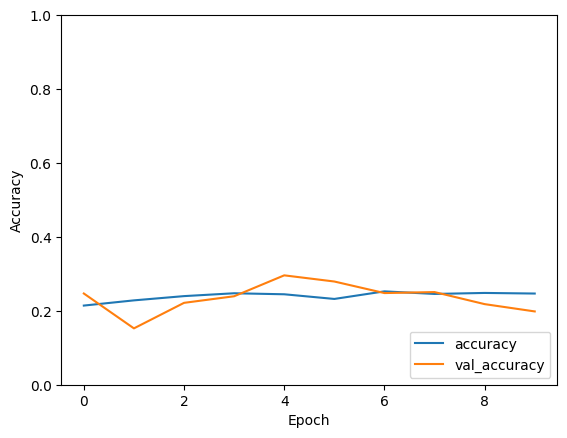

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')

# Val accuracy is the measue of the accuracy on the model of a seperate validation dataset(not used for training) after each epoch
# It gives an estimate of how well the model is generalizing to unseen data
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [35]:
print(test_acc)

0.19831223785877228
